# DEMO 
## by Connor Fricke
---

In [1]:
# Dependencies
import numpy as np
import pandas as pd
import plotly.express as px
from rf4x2mts import rf4x2MTS

In [2]:
# instantiate overlay, which programs the FPGA
overlay = rf4x2MTS(bitfile_name="rfsoc4x2_top.bit")
print("Bitstream downloaded into the PL successfully!")

Turning on SYNC
Turning off SYNC


Bitstream downloaded into the PL successfully!


In [3]:
def acquire(overlay, plot_channels=['chA','chB','chC','chD'], trunc_channels=['chA','chB','chD'], length=16384):
    """
    This function is useful for preliminary testing and playing around with ADC inputs and outputs.
    @ params:
    overlay - the Overlay class object
    plot_channels - you should include channels in this list if the data on it is meant to be plotted.
    trunc_channels - data on the channels included in this list is truncated from 16-bits to 12-bit values according to ADC accuracy.
    length - number of data samples to capture. Needs to be a multiple of 8, because ADC samples are obtained 8 at a time (8 per clk)
    @ returns:
    results dict - contains 'fig' (a simple plot of data on all channels in plot_channels), 'array' and 'df' are just the data captured
    and stored in two different structures, a np.ndarray and a pd.DataFrame object.
    """
    results = {}
    capture_data = np.zeros((4,length), dtype=np.int16)
    # we can capture the data like so, then transform it into a dataframe.
    overlay.internal_capture(capture_data)
    df = pd.DataFrame()
    df['chA'] = capture_data[3]
    df['chB'] = capture_data[2]
    df['chC'] = capture_data[1]
    df['chD'] = capture_data[0]
    # As it stands, the ADC data streams in as 16-bit signed integers, but we only want the top 12 MSBs
    for channel in trunc_channels:
        df[channel] = np.right_shift(df[channel], 4)
    fig = px.line(df, x=range(length), y=plot_channels)
    results['fig'] = fig
    results['array'] = capture_data
    results['df'] = df
    return results

In [8]:
results = acquire(overlay, plot_channels=['chA','chD'], trunc_channels=['chA','chD'],length=2016)

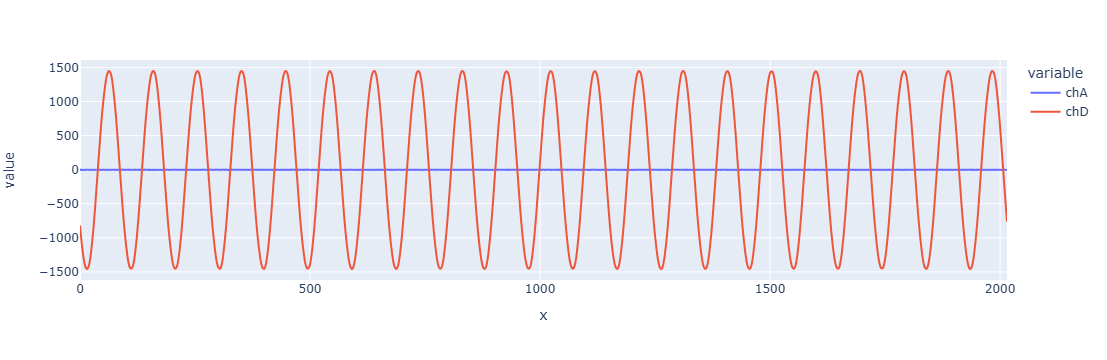

In [9]:
results['fig']